#  Assignment : Lending Case Study

This Case study is w.r.t the assignment given to us for the EDA module

1. **Harshali Bhoyar**
2. **Rupesh Kumar Shukla**


# Step 1 : Import Relevant Libraries and CSV file

In [3]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
loan = pd.read_csv("loan.csv")
loan_df = loan.copy()
loan_df.head()

C:\Users\21985\AppData\Local\Temp\ipykernel_8992\4034085484.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Step 2 : Data Cleaning

## 2.1 Columns with missing values

In [5]:
na_values_grtr_90 = loan_df.isna().mean()*100
na_values_grtr_90
columns_to_drop = na_values_grtr_90[na_values_grtr_90 > 90.0]
#The below print command will give the columns with missing percentage > 90
print("Columns with missing percentage > 90 : \n", columns_to_drop,"\n")

#The below code gives the columns that needs to be dropped.
print("Columns to drop : \n", columns_to_drop.index,"\n")

#The below code drops the column with missing values > 90
loan_df.drop(columns=columns_to_drop.index, inplace=True)

Columns with missing percentage > 90 : 
 mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_tl   

### 2.1.1 Columns to drop
1. We identified columns with missing value percentage > 90%.
2. We dropped those columns as they won't give any specific analysis.
3. 55 Columns remain after dropping the columns with Null values with missing percentage > 90%

In [6]:
loan_df.shape
#We have total 39717 Rows and 55 Columns considering all the cases i.e. current, fully paid, charged off

(39717, 55)

In [7]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### 2.1.2 Filter Loan Status which are Fully Paid or charged off is the data of our interest

In [8]:
#Filter out the data set with loan status not equal to current, which will give us the data of our interese
loan_df = loan_df[loan_df["loan_status"]!='Current']
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

### 2.1.3 Analyze the object type categorical columns to identify the unique values.

In [9]:
loan_df.nunique().sort_values(ascending=True)

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq      

### 2.1.4 Columns with least signifiance
1. id = This is not required as it is just for unique identification
2. member_id =  This is not required as it is just for unique identification
3. url = This is not required as urls are unique
4. desc = This is a text column and cleaning will be a difficult task. Purpose column to be used instead
5. zip_code = The zipcode is incomplete. It doesn't give any significant understanding.
6. initial_list_status = This column just has 1 value 'f'. 
7. emp_title = Lots of unique data. Significant categorical analysis won't happen
8. application_type = This column just has 1 value
9. title = This column can be dropped as it has lots of values, thus cannot be used a categorical data

We can drop the above columns and do further analysis

By looking at the data, the following columns can also be dropped due to limited values:
1. tax_liens = Only 0 and NA 
2. delinq_amnt = Only 0 and NA
3. chargeoff_within_12_mths = Only 0 and NA
4. acc_now_delinq = 0 only
5. policy_code = 1 Only 
6. collections_12_mths_ex_med = Only 0 and NA
7. out_prncp = 0 Only
8. out_prncp_inv = 0 only


In [10]:
least_signi_col = ['id','member_id','url','desc','zip_code','initial_list_status','emp_title','application_type','tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'out_prncp', 'out_prncp_inv','title']
loan_df.drop(least_signi_col, axis=1, inplace=True)
loan_df.shape

(38577, 38)

In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  pymnt_plan            

### 2.1.5 Identify columns that are highly co-related.
1. We have chosen columns like loan_amnt, funded_amnt etc., as these columns represent a similar aspect
2. If 1 or more columns are highly co-related then, we can take only 1 column into consideration 

C:\Users\21985\AppData\Local\Temp\ipykernel_8992\416780345.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_df[correlated_columns].corr()


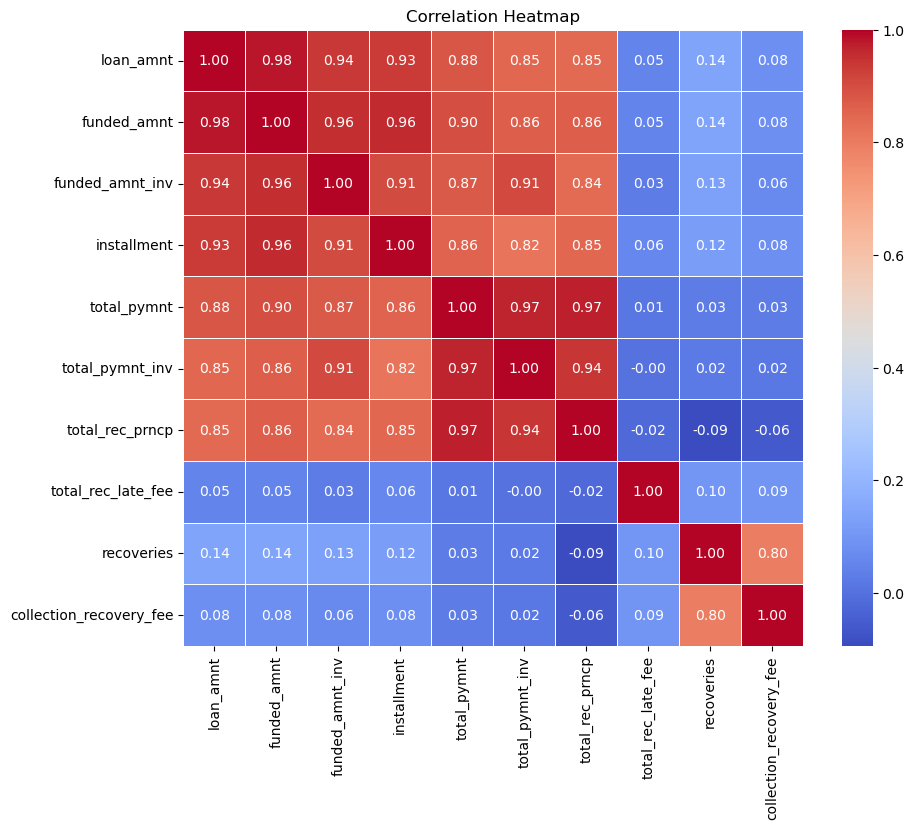

In [12]:
correlated_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'pymnt_plan','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
correlation_matrix = loan_df[correlated_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


#### From the heatmap we can see that the above columns are highly co-related. Thus, we can consider any one of the column and the same result can be applied on other parameters also

We can drop all the correalted columns. I am keeping 'total_pymnt_inv' and 'recoveries' columns.
1. loan_amnt
2. funded_amnt
3. funded_amnt_inv
4. installment pymnt_plan
5. total_pymnt
6. total_rec_prncp
7. collection_recovery_fee

In [13]:
correlated_columns_to_drop = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'pymnt_plan', 'total_pymnt', 'total_rec_prncp','collection_recovery_fee']
loan_df.drop(columns=correlated_columns_to_drop, inplace=True)

In [205]:
loan_df.shape

(38577, 30)

### We have dropped total of 81 Columns and only 30 columns of interest remain as of now. We'll do further analysis on the columns which needs to be cleaned.

## 2.2 Column cleaning and data formatting

#### After dropping the least significant columns, we can do the cleaning of the data where special characters like "%" are present. This will help the columns to be treated as a quantifiable data. Also, we can convert all the date columns into the date data type.

In [14]:
#loan_df_dcol is the data set that is created after dropping all the relevant data 

loan_df_dcol = loan_df.copy()
loan_df['revol_util'] = loan_df_dcol['revol_util'].str.rstrip('%').astype(float)
loan_df['int_rate'] = loan_df_dcol['int_rate'].str.rstrip('%').astype(float)
loan_df['term'] = loan_df_dcol['term'].str.rstrip('months').astype(int)
loan_df['issue_d'] = pd.to_datetime(loan_df_dcol['issue_d'], format='%b-%y')
loan_df['last_pymnt_d'] = pd.to_datetime(loan_df_dcol['last_pymnt_d'], format='%b-%y')
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df_dcol['last_credit_pull_d'], format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df_dcol['earliest_cr_line'], format='%b-%y')
loan_df.head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,revol_util,total_acc,total_pymnt_inv,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,...,83.7,9,5833.84,863.16,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,...,9.4,4,1008.71,435.17,0.00,117.08,2013-04-01,119.66,2013-09-01,0.0
2,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,...,98.5,10,3005.67,605.67,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,...,21.0,37,12231.89,2214.92,16.97,0.00,2015-01-01,357.48,2016-04-01,0.0
5,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,...,28.3,12,5632.21,632.21,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0


In [15]:
loan_df.shape

(38577, 30)

### 2.2.1 Column Cleaning 
1. revol_util = % sign removed and converted to float
2. int_rate = % sign removed and converted to float
3. term = months removed and converted to int
4. issue_d, last_pymnt_d, last_credit_pull_d, earliest_cr_line has been converted into date format

## Step 3 : Data Analysis and Visualization

### 3.1 Bivariate Analysis 

#### 3.1.1 Create Bins for the "revol_util"
##### Utilization Bins
1. 0%-20%
2. 20%-40%
3. 40%-60%
4. 60%-80%
5. 80%-100%

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_wrt_percentage(dataframe, x1, y1,figsize=(10, 6)):
    piv_table = dataframe.groupby([x1, y1]).size().unstack(fill_value=0).reset_index()
    piv_table['Total'] = piv_table['Charged Off'] + piv_table['Fully Paid']
    piv_table['Default%'] = round(piv_table['Charged Off'] / piv_table['Total'] * 100, 2)

    #print("Following is the table for : ",x1,"w.r.t",y1, "\n\n\n", piv_ls_util_range_sorted)
    piv_table_sorted = piv_table.sort_values(by='Default%')
    plt.figure(figsize=figsize)
    # Plotting the results
    ax = sns.barplot(x=x1, y='Default%', data=piv_table_sorted)
    ax.bar_label(ax.containers[0])
    plt.xlabel(x1)
    plt.ylabel('Charged off or Default%')
    plt.xticks(rotation=45)
    plt.title('Charged off/Default% vs ' + y1)

    plt.show()
    

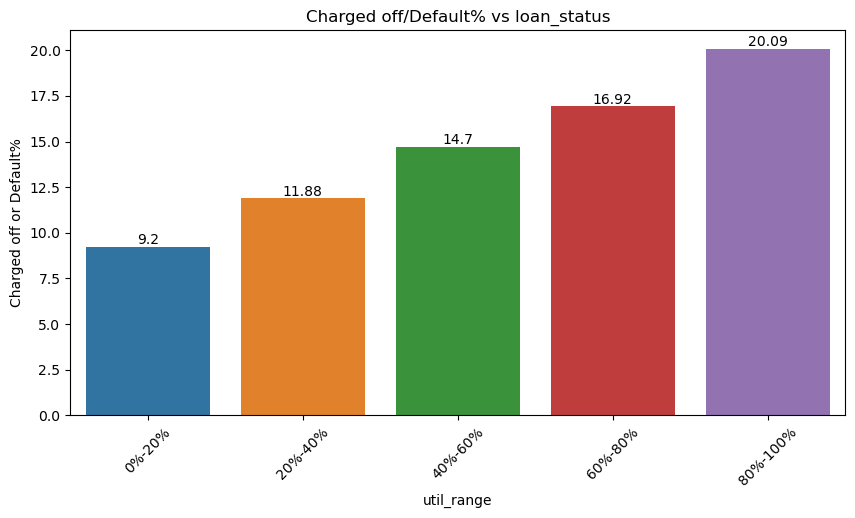

In [18]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0%-20%', '20%-40%', '40%-60%', '60%-80%', '80%-100%']
new_loan_df = loan_df.dropna(subset=['revol_util']).copy()
new_loan_df['util_range'] = pd.cut(new_loan_df['revol_util'],bins=bins,labels=labels)
figsize = (10, 5)
plot_wrt_percentage(new_loan_df,'util_range','loan_status',figsize)

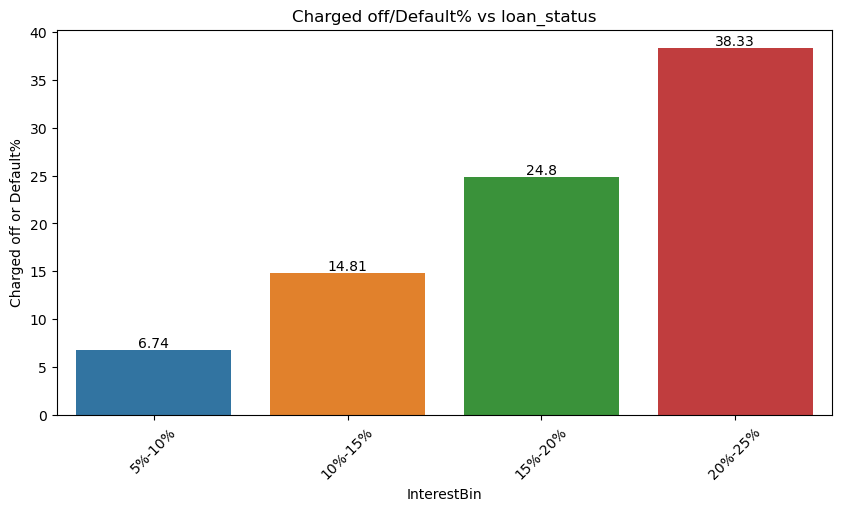

In [19]:
bins = [5, 10, 15, 20, 25]
labels = ['5%-10%', '10%-15%', '15%-20%', '20%-25%']
loan_df['InterestBin'] = pd.cut(loan_df['int_rate'],bins=bins,labels=labels)
figsize = (10, 5)
plot_wrt_percentage(new_loan_df,'InterestBin','loan_status',figsize)

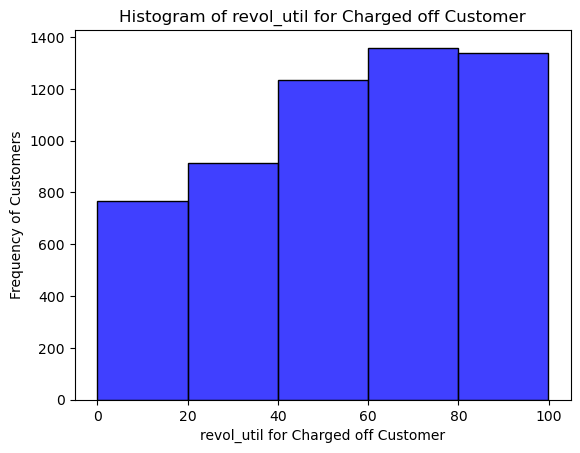

In [21]:
Charged_Off_df = loan_df[loan_df['loan_status']=='Charged Off']
Charged_Off_df['revol_util'].info

sns.histplot(Charged_Off_df['revol_util'], bins=5 , color='blue')
plt.title('Histogram of revol_util for Charged off Customer')
plt.xlabel('revol_util for Charged off Customer')
plt.ylabel('Frequency of Customers')

plt.show()

In [23]:
loan_df.shape

(38577, 31)

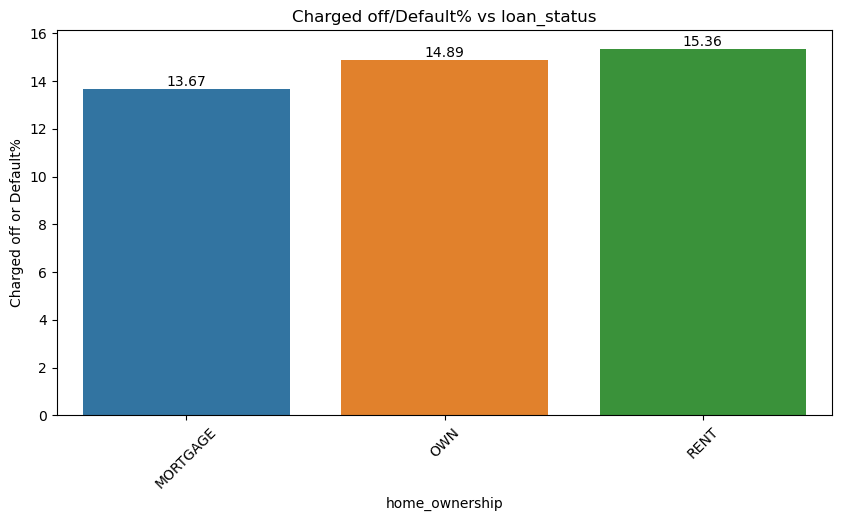

In [22]:
figsize = (10, 5)
plot_wrt_percentage(loan_df[(loan_df['home_ownership']!='NONE')&(loan_df['home_ownership']!='OTHER')],'home_ownership','loan_status',figsize)

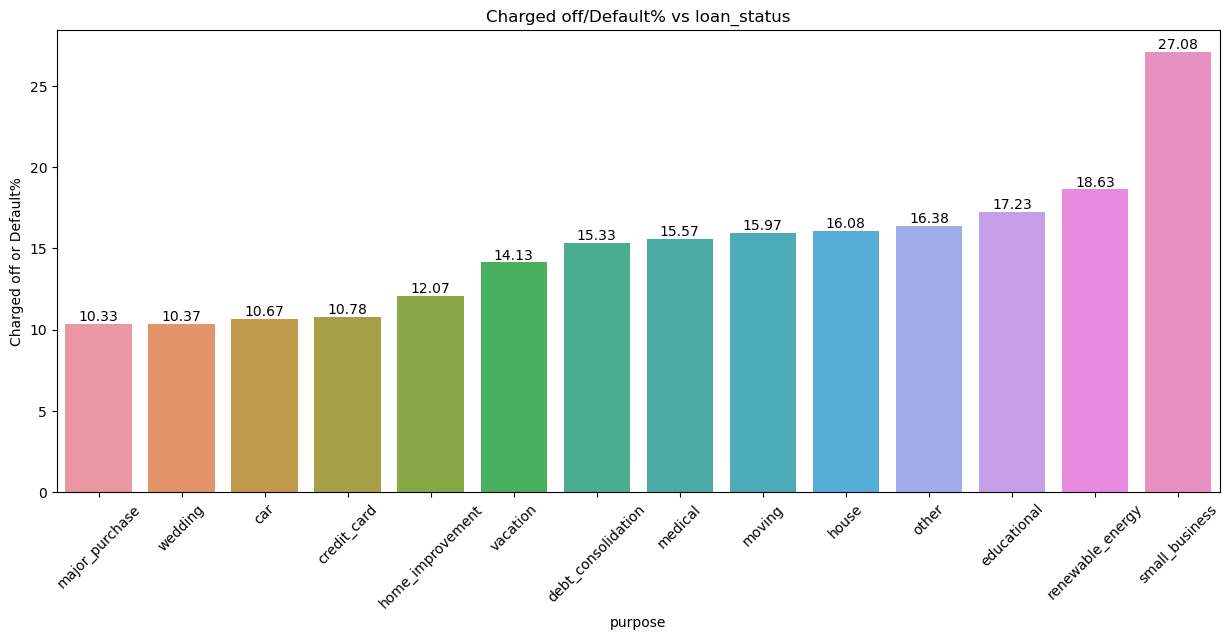

In [24]:
plot_wrt_percentage(loan_df,'purpose','loan_status',figsize=(15, 6))

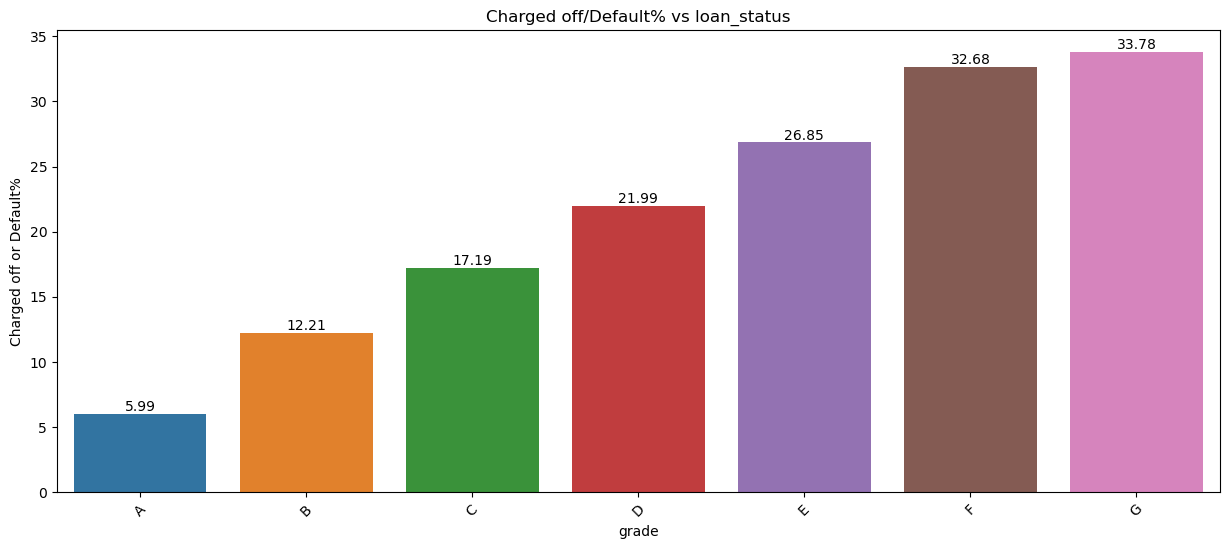

In [26]:
plot_wrt_percentage(loan_df,'grade','loan_status',figsize=(15, 6))

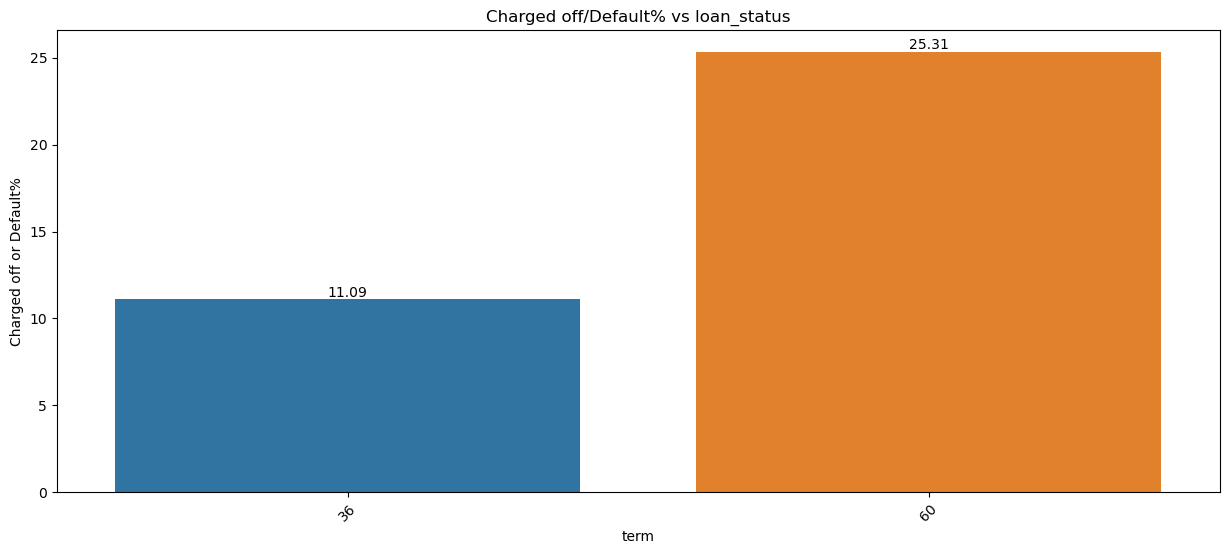

In [27]:
plot_wrt_percentage(loan_df,'term','loan_status',figsize=(15, 6))

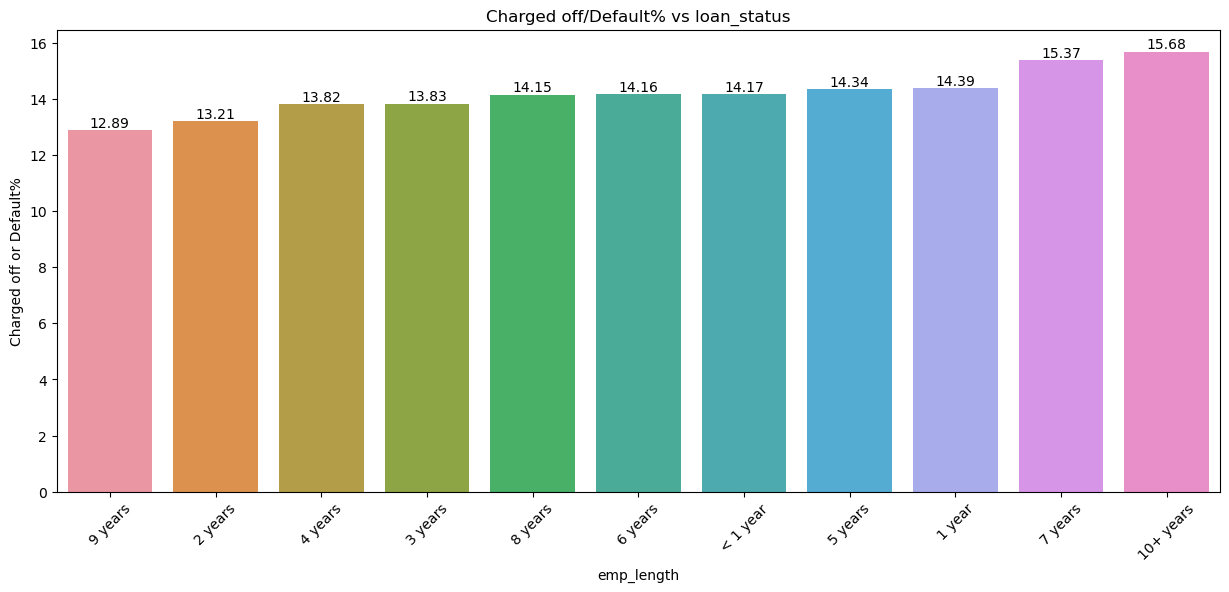

In [28]:
plot_wrt_percentage(loan_df,'emp_length','loan_status',figsize=(15, 6))

<Figure size 2000x600 with 0 Axes>

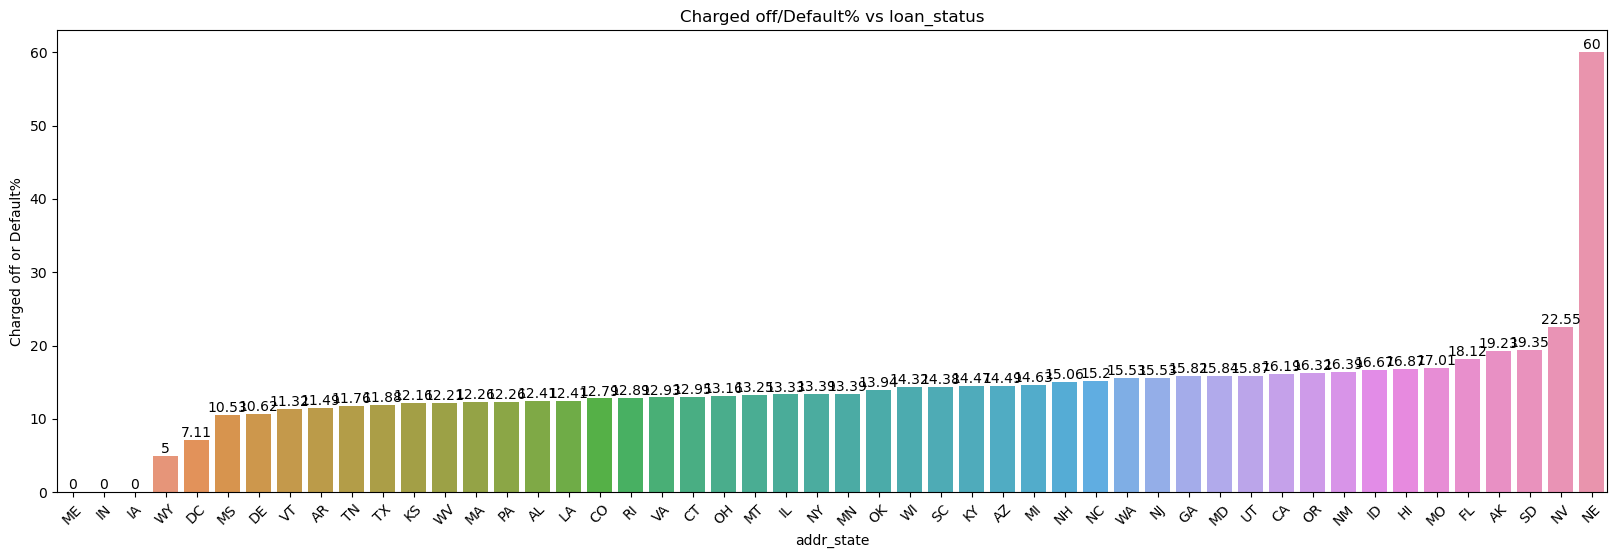

In [29]:
plt.figure(figsize=(20, 6))
plot_wrt_percentage(loan_df,'addr_state','loan_status',figsize=(20, 6))

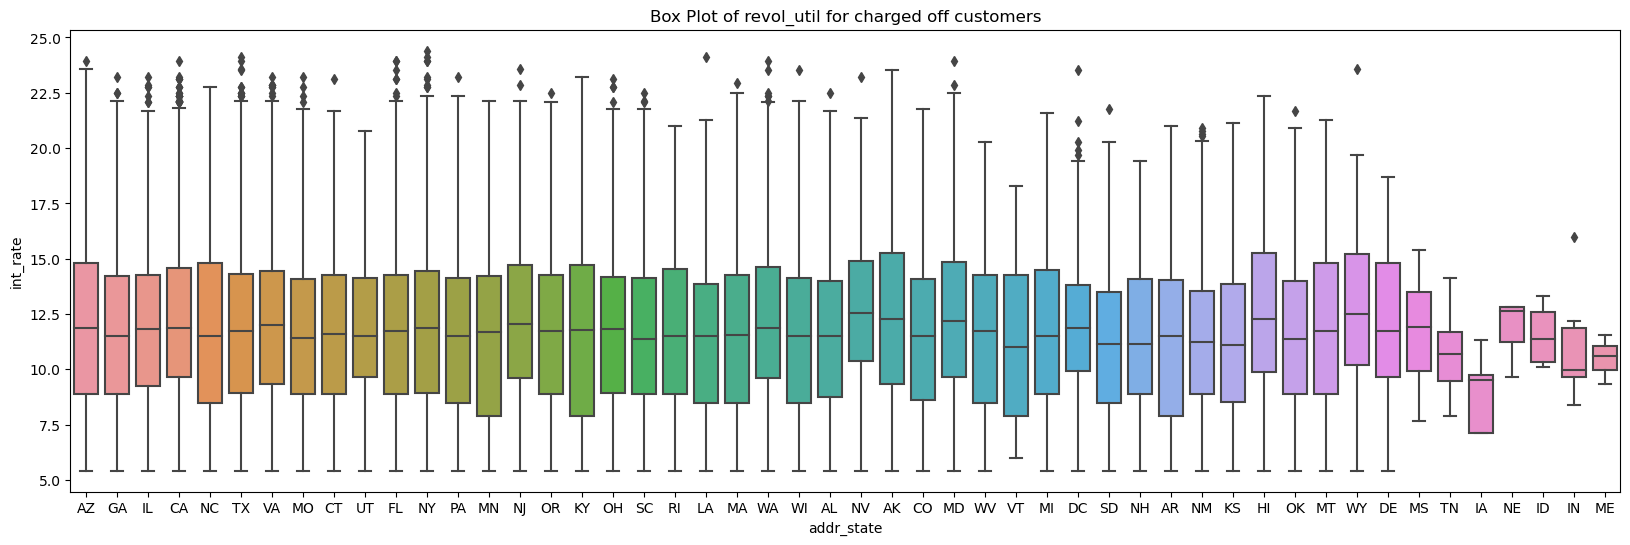

In [30]:
plt.figure(figsize=(20, 6))  # Set the figure size before creating the plot
sns.boxplot(x='addr_state', y='int_rate', data=loan_df)
plt.title('Box Plot of revol_util for charged off customers')
plt.show()

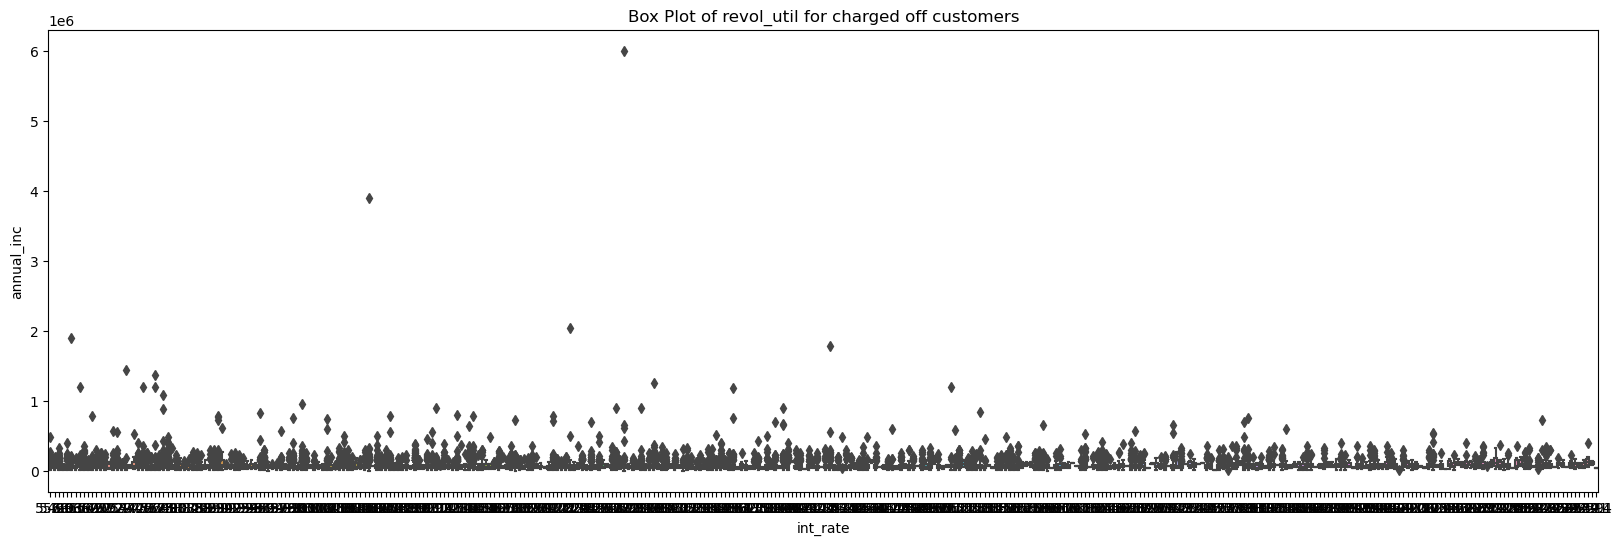

In [69]:
plt.figure(figsize=(20, 6))  # Set the figure size before creating the plot
sns.boxplot(x='int_rate', y='annual_inc', data=loan_df_clnd)
plt.title('Box Plot of revol_util for charged off customers')
plt.show()

### From the above line chart and histogram  we can infer the following:
1. Increased likely-hood with Increasing utilization
2. People with high credit utilization are more likely to be defaulters when compared to people with lesser utilization.
3. People with utilization <30% can be our ideal customers
4. Frequency distrubtuion is highest for the people with highest utilization.
5. From the box plot we can see that the median is close to 60%.

### From the above line chart and histogram  we can infer the following:
1. Customer with Small_business are likely to be charged off compared to other businesses


loan_amnt: The loan amount requested.
int_rate: The interest rate on the loan.
annual_inc: The borrower's annual income.
dti: Debt-to-Income ratio.
delinq_2yrs: Number of delinquencies in the borrower's credit file.
revol_util: Revolving line utilization rate.
open_acc: Number of open credit lines.
pub_rec: Number of derogatory public records.